# Widzenie maszynowe
## Laboratorium 3 - Image skeletonization
*Autor: Paweł Mendroch* - [Github](https://github.com/FrozenTear7/computer-vision-lab/tree/master/lab3)

In [3]:
%matplotlib inline

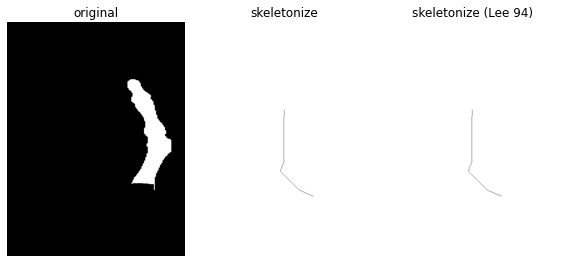

In [19]:
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

image = plt.imread('./input/img_0006_mask_Unet_toe.png')

skeleton = skeletonize(image)
skeleton_lee = skeletonize(image, method='lee')

fig, axes = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('skeletonize')
ax[1].axis('off')

ax[2].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[2].set_title('skeletonize (Lee 94)')
ax[2].axis('off')

fig.tight_layout()
plt.show()

**Medial axis skeletonization**

The medial axis of an object is the set of all points having more than one
closest point on the object's boundary. It is often called the *topological
skeleton*, because it is a 1-pixel wide skeleton of the object, with the same
connectivity as the original object.

Here, we use the medial axis transform to compute the width of the foreground
objects. As the function ``medial_axis`` returns the distance transform in
addition to the medial axis (with the keyword argument ``return_distance=True``),
it is possible to compute the distance to the background for all points of
the medial axis with this function. This gives an estimate of the local width
of the objects.

For a skeleton with fewer branches, ``skeletonize`` should be preferred.



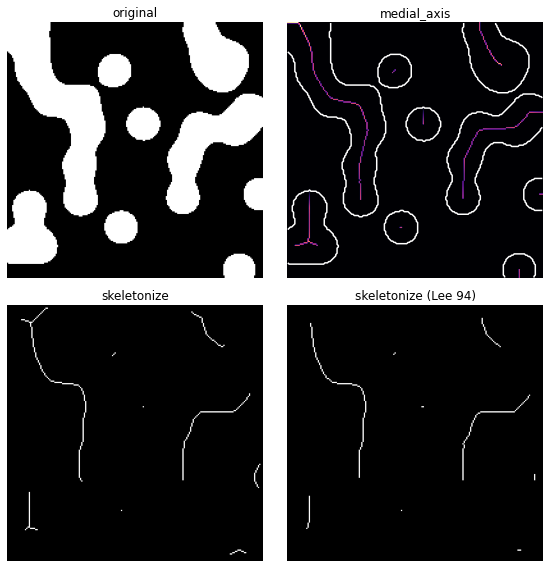

In [9]:
from skimage.morphology import medial_axis, skeletonize

# Generate the data
blobs = data.binary_blobs(200, blob_size_fraction=.2,
                          volume_fraction=.35, seed=1)

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(blobs, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(blobs)
skeleton_lee = skeletonize(blobs, method='lee')

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(dist_on_skel, cmap='magma')
ax[1].contour(blobs, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray)
ax[2].set_title('skeletonize')
ax[2].axis('off')

ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[3].set_title("skeletonize (Lee 94)")
ax[3].axis('off')

fig.tight_layout()
plt.show()

**Morphological thinning**

Morphological thinning, implemented in the `thin` function, works on the
same principle as `skeletonize`: remove pixels from the borders at each
iteration until none can be removed without altering the connectivity. The
different rules of removal can speed up skeletonization and result in
different final skeletons.

The `thin` function also takes an optional `max_iter` keyword argument to
limit the number of thinning iterations, and thus produce a relatively
thicker skeleton.



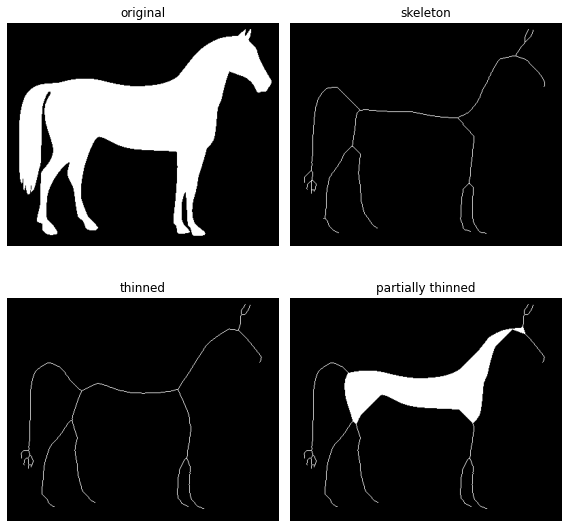

In [10]:
from skimage.morphology import skeletonize, thin

skeleton = skeletonize(image)
thinned = thin(image)
thinned_partial = thin(image, max_iter=25)

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('skeleton')
ax[1].axis('off')

ax[2].imshow(thinned, cmap=plt.cm.gray)
ax[2].set_title('thinned')
ax[2].axis('off')

ax[3].imshow(thinned_partial, cmap=plt.cm.gray)
ax[3].set_title('partially thinned')
ax[3].axis('off')

fig.tight_layout()
plt.show()